### 1. Import packages & show it's current version.

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import time

print(f"""Pandas {pd.__version__},
Numpy {np.__version__},
JSON {json.__version__},
Requests {requests.__version__},
Time {time}""")

Pandas 0.23.0,
Numpy 1.14.3,
JSON 2.0.9,
Requests 2.23.0,
Time <module 'time' (built-in)>


## 2. Use SQL Database style to request the user IDs & save as txt file
### The SQL style request are as follows:
### ("%20" stands for "space" in SQL command line) 

https://api.opendota.com/api/explorer?sql=SELECT
%20account_id
%20FROM%
20players
%20
WHERE
%20players.last_match_time
%20%3E%3D%
20to_timestamp(extract(epoch%20from%20timestamp%20'2020-07-19T23%3A00%3A00.000Z'))
%20AND%20fh_unavailable%20is%20false%20LIMIT%2050000

In [2]:
return_data = requests.get("https://api.opendota.com/api/explorer?sql=SELECT%20account_id%20FROM%20players%20WHERE%20players.last_match_time%20%3E%3D%20to_timestamp(extract(epoch%20from%20timestamp%20'2020-07-19T23%3A00%3A00.000Z'))%20AND%20fh_unavailable%20is%20false%20LIMIT%2050000")

after_data = return_data.json()
after_data

{'command': 'SELECT',
 'rowCount': 50000,
 'oid': None,
 'rows': [{'account_id': 395887846},
  {'account_id': 111344747},
  {'account_id': 202587743},
  {'account_id': 136497904},
  {'account_id': 245258641},
  {'account_id': 214780951},
  {'account_id': 140015460},
  {'account_id': 136689886},
  {'account_id': 232528238},
  {'account_id': 1118207110},
  {'account_id': 162857636},
  {'account_id': 201581467},
  {'account_id': 142211766},
  {'account_id': 86648881},
  {'account_id': 167348403},
  {'account_id': 153280030},
  {'account_id': 108202260},
  {'account_id': 446995686},
  {'account_id': 104250026},
  {'account_id': 177746859},
  {'account_id': 148091700},
  {'account_id': 1144167},
  {'account_id': 125501795},
  {'account_id': 110456958},
  {'account_id': 196530297},
  {'account_id': 297133514},
  {'account_id': 919169272},
  {'account_id': 114582344},
  {'account_id': 1096758139},
  {'account_id': 153177193},
  {'account_id': 126336853},
  {'account_id': 185574577},
  {'accou

## In return results, dictionary key 'rows' contains the values that we want.

In [3]:
targ_data = after_data['rows']
targ_data

test = pd.DataFrame.from_dict(targ_data)
test.head(n = 6)

test.to_csv("ID_Long_List.csv", index = False)

### At this point, we have the ID numbers.
#### According to experience, calling each information matching to 1 ID, average will take 1 sec.

#### Total data requests = 50000 IDs x 4 types of information (WL, Totals, WardMap, & WordCloud) request times
####                                   = 50000 x 4
####                                   = 200000 (Two hundred thousand seconds)

#### Estimate time = (200000 / 60) / 60 == 3333.33 mins == 55.55 hrs

### In order to save time, IDs will be split into multiple (5 parts) lists, 
#### for multiple API Call programs to run simultaneously, to save time and boost up speed.

In [4]:
#Splitting IDs

root_ID = pd.read_csv("ID_Long_List.csv")
root_ID.head(n = 5)
#Testing API_CALLS under each variables
#How to append the results
root_ID.shape

target_ID_1 = list(root_ID.account_id[0:10000])
print(len(target_ID_1))
#print(target_ID_1[0:10])
print(f"1 Head: {target_ID_1[:5]}")
print(f"1 Last: {target_ID_1[-5:]}")

target_ID_2 = list(root_ID.account_id[10000:20000])
print(len(target_ID_2))
print(f"2 Head: {target_ID_2[:5]}")
print(f"2 Last: {target_ID_2[-5:]}")

target_ID_3 = list(root_ID.account_id[20000:30000])
print(len(target_ID_3))
print(f"3 Head: {target_ID_3[:5]}")
print(f"3 Last: {target_ID_3[-5:]}")

target_ID_4 = list(root_ID.account_id[30000:40000])
print(len(target_ID_4))
print(f"4 Head: {target_ID_4[:5]}")
print(f"4 Last: {target_ID_4[-5:]}")

target_ID_5 = list(root_ID.account_id[40000:])
print(len(target_ID_5))
print(f"5 Head: {target_ID_5[:5]}")
print(f"5 Last: {target_ID_5[-5:]}")

10000
1 Head: [395887846, 111344747, 202587743, 136497904, 245258641]
1 Last: [1111162623, 218341814, 375419771, 112642372, 236752251]
10000
2 Head: [123982768, 142476401, 201148571, 1010858461, 113796857]
2 Last: [314334385, 106176037, 137254795, 212379607, 114740931]
10000
3 Head: [1100542676, 316459999, 113336524, 136784042, 177655765]
3 Last: [115541858, 384921147, 325738550, 126044327, 286690496]
10000
4 Head: [319791312, 21498599, 116092921, 1060096897, 153114615]
4 Last: [105364612, 113592858, 966233349, 1070896690, 206843269]
10000
5 Head: [305449703, 115454075, 113604511, 1096058738, 198932292]
5 Last: [140403692, 294045404, 138390195, 163937364, 230751755]


### Before calling ID information, we need to know the return results first
#### Establishing testing ID list

In [5]:
#First 5 IDs

testing_ID = list(root_ID.account_id[0:5])
testing_ID

[395887846, 111344747, 202587743, 136497904, 245258641]

### The return results of WL, Totals, WardMap & WordCloud.

In [6]:
datawlDB = []

for api_calls in testing_ID:
    print(f"ID number: {api_calls}")

    data = requests.get(f"https://api.opendota.com/api/players/{api_calls}/wl?api_key=e11aabd8-0b6e-4c0e-a6e9-991212795b57")
    afterdata = data.json()
    datawlDB.append(afterdata)
    time.sleep(0.5)

print("Done.") #Make sure that the For-Loop is done!
datawlDB

ID number: 395887846
ID number: 111344747
ID number: 202587743
ID number: 136497904
ID number: 245258641
Done.


[{'win': 414, 'lose': 446},
 {'win': 453, 'lose': 544},
 {'win': 530, 'lose': 583},
 {'win': 65, 'lose': 74},
 {'win': 240, 'lose': 284}]

In [7]:
datatotalsDB = []

for x in testing_ID:
    print(f"ID number: {x}")

    data = requests.get(f'https://api.opendota.com/api/players/{x}/totals')
    afterdata = data.json()
    datatotalsDB.append(afterdata)
    time.sleep(0.5)

print("Done.")
datatotalsDB

ID number: 395887846
ID number: 111344747
ID number: 202587743
ID number: 136497904
ID number: 245258641
Done.


[[{'field': 'kills', 'n': 860, 'sum': 5729},
  {'field': 'deaths', 'n': 860, 'sum': 6676},
  {'field': 'assists', 'n': 860, 'sum': 12714},
  {'field': 'kda', 'n': 860, 'sum': 2491},
  {'field': 'gold_per_min', 'n': 860, 'sum': 346587},
  {'field': 'xp_per_min', 'n': 860, 'sum': 477011},
  {'field': 'last_hits', 'n': 860, 'sum': 133708},
  {'field': 'denies', 'n': 860, 'sum': 2805},
  {'field': 'lane_efficiency_pct', 'n': 43, 'sum': 2087},
  {'field': 'duration', 'n': 860, 'sum': 2143066},
  {'field': 'level', 'n': 860, 'sum': 18760},
  {'field': 'hero_damage', 'n': 839, 'sum': 20098365},
  {'field': 'tower_damage', 'n': 839, 'sum': 1730890},
  {'field': 'hero_healing', 'n': 839, 'sum': 538533},
  {'field': 'stuns', 'n': 45, 'sum': 1842.1015974959998},
  {'field': 'tower_kills', 'n': 45, 'sum': 44},
  {'field': 'neutral_kills', 'n': 45, 'sum': 2218},
  {'field': 'courier_kills', 'n': 45, 'sum': 1},
  {'field': 'purchase_tpscroll', 'n': 45, 'sum': 390},
  {'field': 'purchase_ward_observe

In [8]:
datawardmapDB = []

for x in testing_ID:
    print(f"ID number: {x}")

    data = requests.get(f'https://api.opendota.com/api/players/{x}/wardmap')
    afterdata = data.json()
    datawardmapDB.append(afterdata)
    time.sleep(0.5)

print("Done.")
datawardmapDB

ID number: 395887846
ID number: 111344747
ID number: 202587743
ID number: 136497904
ID number: 245258641
Done.


[{'obs': {'84': {'144': 4, '154': 1, '156': 1},
   '86': {'142': 3,
    '144': 6,
    '146': 2,
    '156': 3,
    '158': 1,
    '162': 2,
    '164': 3},
   '88': {'142': 4, '158': 1},
   '90': {'156': 1},
   '92': {'116': 1, '118': 1, '158': 1, '164': 1},
   '94': {'118': 1, '140': 1},
   '96': {'140': 1},
   '100': {'132': 1, '168': 1},
   '102': {'154': 1, '168': 1},
   '104': {'132': 1},
   '106': {'130': 2, '132': 1},
   '112': {'130': 1},
   '114': {'128': 3},
   '116': {'126': 4},
   '118': {'90': 1},
   '120': {'90': 1, '120': 1, '138': 1},
   '122': {'138': 1},
   '124': {'142': 1},
   '126': {'118': 2, '142': 2, '144': 1},
   '128': {'118': 1, '144': 1},
   '130': {'126': 1},
   '132': {'108': 2, '110': 1},
   '134': {'94': 1, '96': 1, '108': 2, '124': 1, '162': 2, '166': 1},
   '136': {'96': 1, '162': 1, '164': 3, '166': 1},
   '138': {'92': 1, '120': 1},
   '140': {'120': 1},
   '142': {'98': 1, '104': 1, '120': 1},
   '144': {'120': 1, '122': 1},
   '146': {'118': 1},
   '1

In [9]:
datawordcloudDB = []

for x in testing_ID:
    print(f"ID number: {x}")

    data = requests.get(f'https://api.opendota.com/api/players/{x}/wordcloud')
    afterdata = data.json()
    datawordcloudDB.append(afterdata)
    time.sleep(0.5)

print("Done.")
datawordcloudDB

ID number: 395887846
ID number: 111344747
ID number: 202587743
ID number: 136497904
ID number: 245258641
Done.


[{'my_word_counts': {'ggwp': 24,
   'lag': 1,
   'ggwpo': 1,
   'run': 1,
   'lol': 2,
   'weaver': 1,
   'just': 1,
   'play': 1,
   'nice': 3,
   'report': 3,
   'in': 3,
   'lp': 1,
   'so': 6,
   'trash': 6,
   'now': 2,
   'yeah': 2,
   'time': 3,
   'to': 2,
   'talk': 1,
   'is': 2,
   'real': 1,
   'haha': 8,
   'ty': 2,
   'for': 2,
   'free': 1,
   'game': 1,
   'farm': 1,
   'more': 3,
   'bye': 1,
   'fuck': 1,
   'wait': 2,
   'rs': 1,
   'wa': 1,
   'without': 1,
   'me': 7,
   'end': 1,
   'wtf': 2,
   'ok': 5,
   'times': 1,
   'void': 1,
   'wp': 2,
   'team': 1,
   'w': 1,
   'when': 2,
   'i': 2,
   'fat': 1,
   'he': 2,
   'doesnt': 1,
   'say': 1,
   'anything': 1,
   'but': 1,
   'feed': 1,
   'start': 1,
   'blame': 1,
   'can': 1,
   'u': 2,
   'see': 1,
   'how': 1,
   'miss': 2,
   'raze': 2,
   'replay': 1,
   'ganked': 1,
   'reason': 1,
   'always': 1,
   'hello': 1,
   'again': 1,
   'what': 4,
   'def': 2,
   'wasting': 1,
   'pls': 2,
   'afk': 3,
   'sl

### All of them return within a list [].

### Now for the Large-Scale API Call part
### Demostrating Part.1 using testing list 1 ~ 5 IDs, for real part please view 1. ~ 5.ipynb

In [10]:
#ID too long, split them into "FIVE" parts!!!
root_ID = pd.read_csv("ID_Long_List.csv")

target_ID_1 = list(root_ID.account_id[0:5])
print(len(target_ID_1))
#print(target_ID_1[0:10])
print(f"Part 1 Head 5: {target_ID_1[:5]}") #Double check with the Excel sheet whether not the ID numbers matched?
print(f"Part 1 Last 5: {target_ID_1[-5:]}") #Double check with the Excel sheet whether not the ID numbers matched?

5
Part 1 Head 5: [395887846, 111344747, 202587743, 136497904, 245258641]
Part 1 Last 5: [395887846, 111344747, 202587743, 136497904, 245258641]


In [11]:
wl_DB = []
totalsDB = []
wardmapDB = []
wordcloudDB = []

for x in target_ID_1:
    print(f"ID number: {x}")

    data1 = requests.get(f'https://api.opendota.com/api/players/{x}/wl?api_key=0432964d-ade1-439d-a62c-75fc48f9d94e')
    after1 = data1.json()
    wl_DB.append(after1)

    data2 = requests.get(f'https://api.opendota.com/api/players/{x}/totals?api_key=0432964d-ade1-439d-a62c-75fc48f9d94e')
    after2 = data2.json()
    totalsDB.append(after2)

    data3 = requests.get(f'https://api.opendota.com/api/players/{x}/wardmap?api_key=0432964d-ade1-439d-a62c-75fc48f9d94e')
    after3 = data3.json()
    wardmapDB.append(after3)

    data4 = requests.get(f'https://api.opendota.com/api/players/{x}/wordcloud?api_key=0432964d-ade1-439d-a62c-75fc48f9d94e')
    after4 = data4.json()
    wordcloudDB.append(after4)
    time.sleep(0.5)

print("Done.")
print("Now writing files")

with open('WLDB1.txt', 'w') as outfile:
    json.dump(wl_DB, outfile)

with open('TotalsDB1.txt', 'w') as outfile:
    json.dump(totalsDB, outfile)

with open('WardmapDB1.txt', 'w') as outfile:
    json.dump(wardmapDB, outfile)

with open('WordcloudDB1.txt', 'w') as outfile:
    json.dump(wordcloudDB, outfile)

print("ALL Done!!!")

ID number: 395887846
ID number: 111344747
ID number: 202587743
ID number: 136497904
ID number: 245258641
Done.
Now writing files
ALL Done!!!


### After saving data into txt files according to their information
### Append all 5 parts together as 1 full dataset under each folders.
### Appending WL as example: 

In [12]:
import glob

read_files = glob.glob("*.txt")

with open("ALL_WL.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

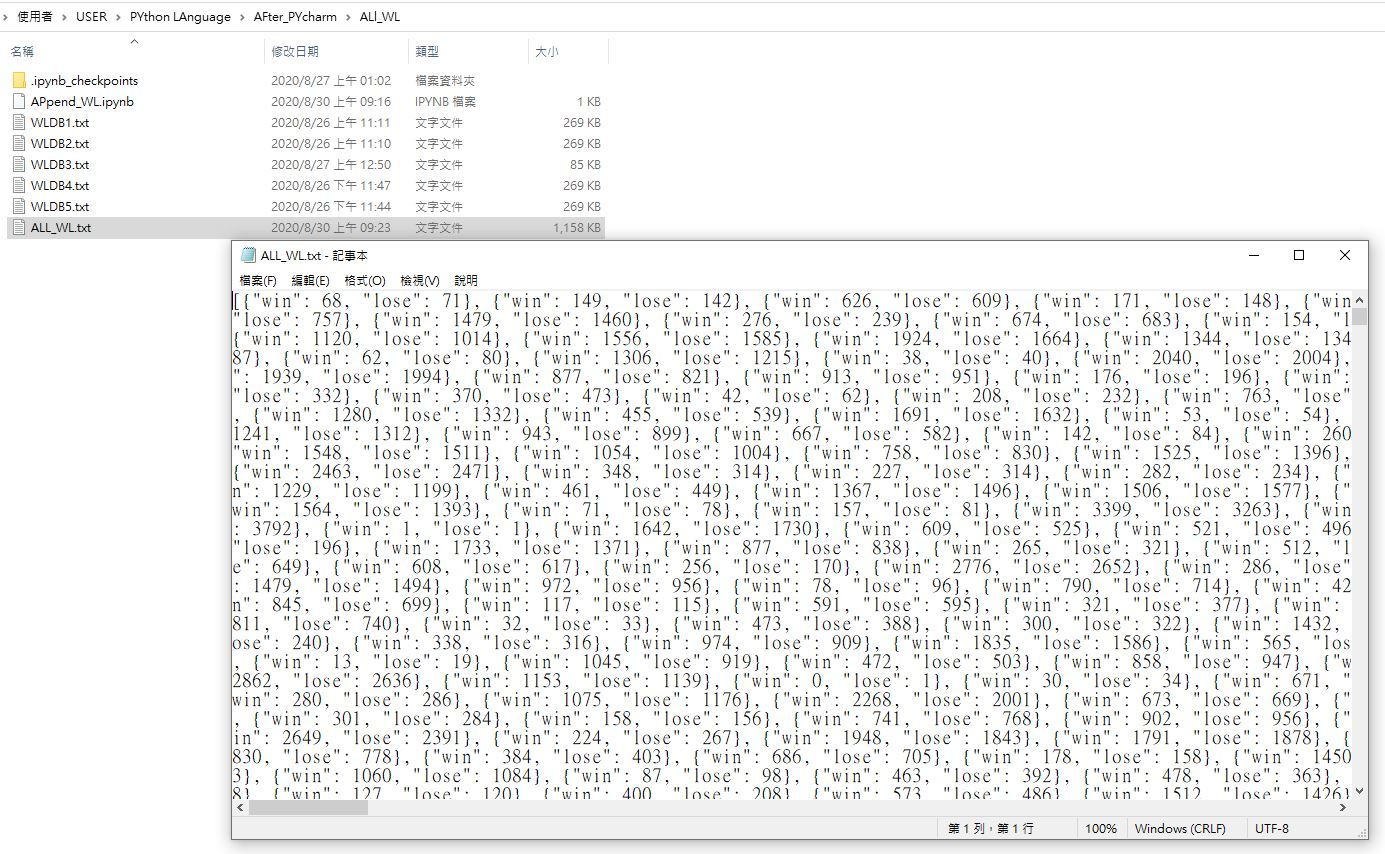

### Repeat the same action onto the rest of the txt files according to their data type.